<a href="https://colab.research.google.com/github/adpr821/MAT-421/blob/main/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 421 | Assignment 2 | 17.1, 17.2, 17.3
- By: Prashil Adhara
- Instructor: Haiyan Wang
- Spring 2024, Session C

## Interpolation

Interpolation is a technique through which for a given a data set, a set of functions can be generated which give a rough estimation through the points of the dataset. These functions intersect, and in higher degree interpolations such as the cubic spline interpolation technique, they are continuous.

- Interpolation is different from regression. For example, in linear regression we attempt to find a best line of fit to the data, however, in linear interpolation we generate functions which intersect each point. Given that the dataset provided is reliable, the piecewise functions aim to provide a satisfactory estimation.

- We will go through the implementations of Linear Interpolation as well as Cubic Spline Interpolation in this document, as well as appropriate uses for them.

## Linear Interpolation

As we know, an equation of a line can be represented as `y = mx + b` where:
- `b` is the y-intercept of the line
- `m` is the slope of the line and
- `(x,y)` is any arbitrary point on the line provided `b` and `m` are given and the above equation holds true.

Given any two points, we can figure out a line that connects the two. For example the points `(1,1)` and `(2,2)` are connected by `y = 1.x + 0`.

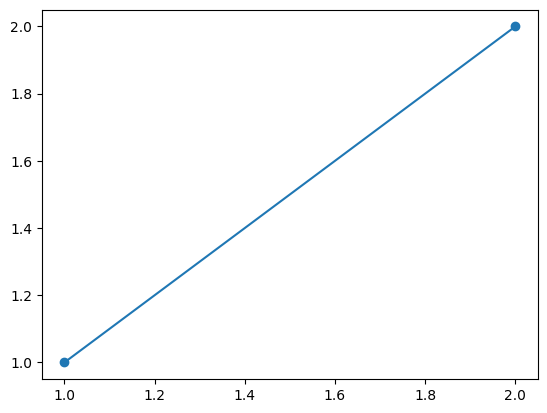

In [5]:
import matplotlib.pyplot as plt

x = [1,2]
y = [1,2]

plt.plot(x,y,'-o')

- As we see, the function `y = 1.x + 0` simplifies to `y = x`, and so for any `x` value, we can calculate the respective `y` value by simply plugging in the variables. This process can be applied for any two points on the cartesian plane.

- With linear interpolation we extend the very same concept. We are now given more than just two points and such a linear function exists between every two points. So for `n` points we will have `n-1` functions.

- The linear interpolation at any point x between two arbitrary points (x<sub>i</sub>,y<sub>i</sub>) and (x<sub>i+1</sub>,y<sub>i+1</sub>) would be y(x) = y<sub>i</sub> + (y<sub>i+1</sub>-y<sub>i</sub>)(x-x<sub>i</sub>)/(x<sub>i+1</sub>-x<sub>i</sub>).

- Below we will implement a linear interpolation example where the data set is as such: `x` represents the seconds elapsed and `y` represents the position of a car as meters away from the origin.




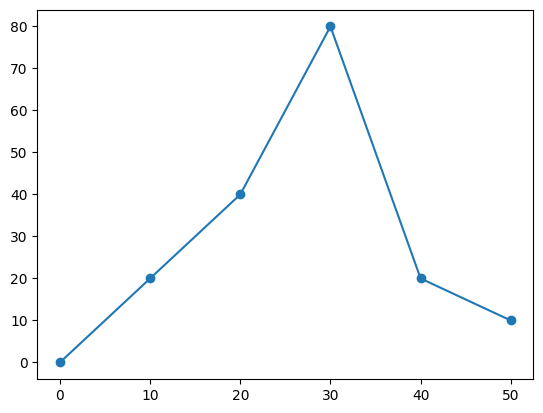

In [4]:
import matplotlib.pyplot as plt

x = [0,10,20,30,40,50]
y = [0,20,40,80,20,10]

plt.plot(x,y,'-o')

- As we see, we have plotted all of the x and their respective y values from the dataset. Now for example, if we wished to find the displacement of the car at x = 25, 35 and 45, we could do so easily as we have the equations for the lines between the points.

at x = 25, y = 60.0
at x = 35, y = 60.0
at x = 45, y = 25.0


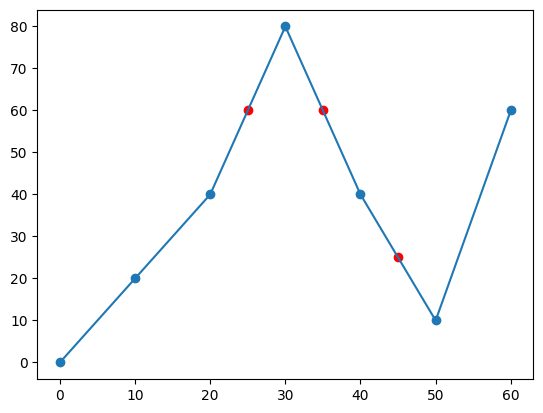

In [10]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [0,10,20,30,40,50,60]
y = [0,20,40,80,40,10,60]

func = interp1d(x,y)

# plt.plot(x, y, args...)
plt.plot(25,func(25), 'ro')
plt.plot(35,func(35), 'ro')
plt.plot(45,func(45), 'ro')

plt.plot(x,y,'-o')

print(f"at x = 25, y = {func(25)}")
print(f"at x = 35, y = {func(35)}")
print(f"at x = 45, y = {func(45)}")

- As we see above, we were able to figure out the displacements of the car where the dataset was not observed.
- However, as we observe at x = 30, there is a sharp peak, and similar peaks which are discontinuous are observed at other points. This is a problem since it's not really possible for the car to have such unrealistic, jerky deviations in its motion.
- At this point, we should begin to discuss how we can estimate points through the dataset while ensuring a smooth transition at the function intersections.

## Cubic Spline Interpolation
- In linear interpolation we used a degree one polynomial to estimate between points. However in Cubic Spline Interpolation, as in the name, we use degree three polynomials.
- Like in linear interpolation, we have a cubic function between every two points. Therefore, for n points we have n-1 equations.
- A cubic polynomial can be expressed as P(x) = ax<sup>3</sup>+bx<sup>2</sup>+cx+d.
- As there are four unknowns in every polynomial `a`,`b`,`c` and `d`, and `n-1` equations, therefore to solve `4(n-1)` unknowns we need an equal number of independent equations.
- 2(n-1) equations can be found by having the cubic functions intersecting the points on the left and right.
- Then we get 2(n-2) equations by constraining the cubic polynomials to have continuous first and second order derivatives at every datapoint.
- The last two independent equations can be defined by defining the second order derivatives to be 0 at the first and last datapoints.
- At this point we have a system of linear equations which can be solved to obtain all coefficients.
- Finally, lets implement the previously linear interpolation as a cubic spline to see a more likely version of how the car would have behaved without jerky movements.

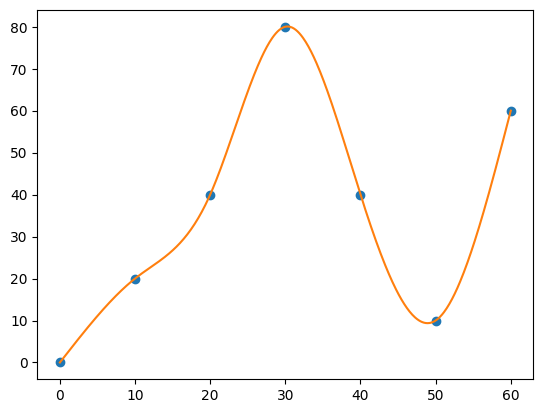

In [13]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0,10,20,30,40,50,60]
y = [0,20,40,80,40,10,60]

func = CubicSpline(x, y, bc_type='natural')
x_plot = np.linspace(0, 60, 500)
y_plot = func(x_plot)

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot)

Lets also find the positions of the car at x = 25, 35 and 45.

at x = 25, y = 64.5576923076923
at x = 35, y = 67.5576923076923
at x = 45, y = 16.461538461538467


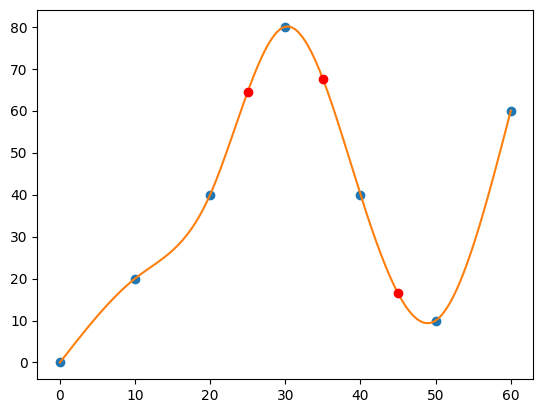

In [16]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0,10,20,30,40,50,60]
y = [0,20,40,80,40,10,60]

func = CubicSpline(x, y, bc_type='natural')
x_plot = np.linspace(0, 60, 500)
y_plot = func(x_plot)

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot)

plt.plot(25,func(25), 'ro')
plt.plot(35,func(35), 'ro')
plt.plot(45,func(45), 'ro')

print(f"at x = 25, y = {func(25)}")
print(f"at x = 35, y = {func(35)}")
print(f"at x = 45, y = {func(45)}")


We can conclude that:
- In datasets where the observations vary greatly and do not follow a linear trend, observing a linear interpolation may introduce misunderstandings regarding the characteristics of the dataset, in which case, a cubic splice interpolation technique may be more viable.
